In [0]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [4]:
from google.colab import files
uploaded=files.upload()

Saving haarcascade_frontalcatface.xml to haarcascade_frontalcatface (1).xml
Saving haarcascade_frontalcatface_extended.xml to haarcascade_frontalcatface_extended (1).xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt (1).xml
Saving haarcascade_frontalface_alt_tree.xml to haarcascade_frontalface_alt_tree (1).xml
Saving haarcascade_frontalface_alt2.xml to haarcascade_frontalface_alt2 (1).xml
Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default (1).xml
Saving lbpcascade_frontalcatface.xml to lbpcascade_frontalcatface (1).xml
Saving lbpcascade_frontalface.xml to lbpcascade_frontalface (1).xml
Saving lbpcascade_frontalface_improved.xml to lbpcascade_frontalface_improved (1).xml
Saving lbpcascade_profileface.xml to lbpcascade_profileface (1).xml
Saving lbpcascade_silverware.xml to lbpcascade_silverware (1).xml
Saving test1.jpg to test1 (2).jpg
Saving test2.jpg to test2 (1).jpg
Saving test3.jpg to test3 (1).jpg
Saving test5.JPG to test5 (1).JPG


In [0]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
#load test iamge
test1 = cv2.imread("test1.jpg")
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

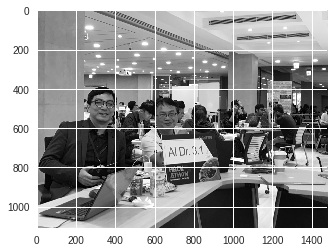

In [12]:
plt.imshow(gray_img, cmap='gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# OpenCV's CascadedClassifier 
has made it simple for us as it comes with the function detectMultiScale, which detects exactly that. Next are some details of its options/arguments:
detectMultiScale(image, scaleFactor, minNeighbors): This is a general function to detect objects, in this case, it'll detect faces since we called in the face cascade. If it finds a face, it returns a list of positions of said face in the form “Rect(x,y,w,h).”, if not, then returns “None”.
Image: The first input is the grayscale image. So make sure the image is in grayscale.
scaleFactor: This function compensates a false perception in size that occurs when one face appears to be bigger than the other simply because it is closer to the camera.
minNeighbors: This is a detection algorithm that uses a moving window to detect objects, it does so by defining how many objects are found near the current one before it can declare the face found.

In [0]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [16]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #let's detect multiscale (some images may be closer to camera than others) images 
#print the number of faces found 
print('Faces found: ', len(faces))


Faces found:  2


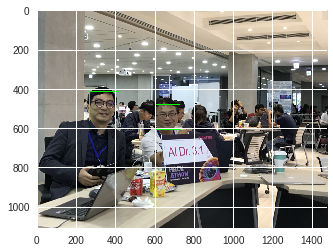

In [17]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

In [0]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

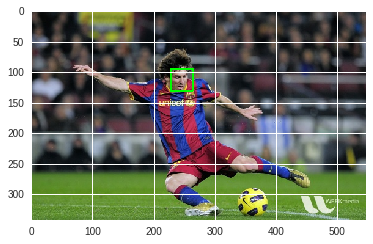

In [30]:
#load another image 
test2 = cv2.imread('test3.jpg')  
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

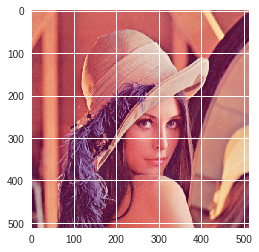

In [23]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')  

#load test image 
test2 = cv2.imread('test2.jpg') 

#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2)  

#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') 
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')  
 
#load test image1 
test1 = cv2.imread('test5.JPG') 
#load test image2 
test2 = cv2.imread('test6.jpg')

In [39]:
#------------HAAR----------- 
#note time before detection 
t1 = time.time()  
print(type(haar_face_cascade), type(test1))
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test1)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 
#print the time difference

<class 'cv2.CascadeClassifier'> <class 'numpy.ndarray'>


In [0]:
#------------LBP----------- 
#note time before detection 
t1 = time.time() 
 
#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test1)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference

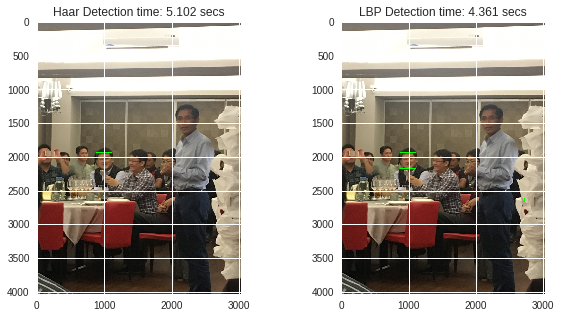

In [41]:
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
 
#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  
 
#show images 
# plt.imshow(faces_detected_img)

2.6726553440093994
0.9116551876068115


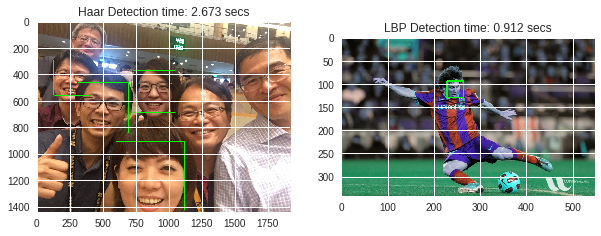

In [42]:
#------------HAAR----------- 
#note time before detection
t1 = time.time()  
 
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test2)  
 
#note time after detection
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 #
print(dt1)   
 
#------------LBP----------- 
#note time before detection
t1 = time.time() 
 
#call our function to detect faces
lbp_detected_img = detect_faces(lbp_face_cascade, test2)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference  
print(dt2)
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
 
 #show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  
 
#show images 
plt.imshow(faces_detected_img)

